## Importing libraries

In [640]:
import pandas as pd
import numpy as np

#Libraries for visualization
import matplotlib.pyplot as plt 
import seaborn as sns

import cufflinks as cf

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from scipy.interpolate import make_interp_spline, BSpline

%matplotlib inline

## Importing COVID-19 glibal data from the git repository

In [641]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv')

In [644]:
covid_data[covid_data['Date'] == '2020-05-21'].sort_values('Confirmed',ascending=False).head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
29523,2020-05-21,US,NaN,37.0902,-95.7129,1577147.0,298418.0,94702.0
25409,2020-05-21,Russia,NaN,60.0000,90.0000,317554.0,92681.0,3099.0
3750,2020-05-21,Brazil,NaN,-14.2350,-51.9253,310087.0,125960.0,20047.0
30007,2020-05-21,United Kingdom,NaN,55.3781,-3.4360,250908.0,0.0,36042.0
27587,2020-05-21,Spain,NaN,40.0000,-4.0000,233037.0,150376.0,27940.0


## Exploratory data analysis

Dataset contains data as as per province and state as well, removing those data will give us country wise count.
Fetching the the current date count will give the latest summed globel data 

In [649]:
temp = covid_data[covid_data['Province/State'].isnull()]

In [650]:
df_countries = temp[temp['Date'] == '2020-05-21'].sort_values('Confirmed',ascending=False)

In [651]:
df_countries = covid_data[covid_data['Date'] == '2020-05-21'].sort_values('Confirmed',ascending=False)

In [652]:
df_countries.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
29523,2020-05-21,US,NaN,37.0902,-95.7129,1577147.0,298418.0,94702.0
25409,2020-05-21,Russia,NaN,60.0000,90.0000,317554.0,92681.0,3099.0
3750,2020-05-21,Brazil,NaN,-14.2350,-51.9253,310087.0,125960.0,20047.0
30007,2020-05-21,United Kingdom,NaN,55.3781,-3.4360,250908.0,0.0,36042.0
27587,2020-05-21,Spain,NaN,40.0000,-4.0000,233037.0,150376.0,27940.0


In [653]:
#Remove unneccesary columns

In [654]:
df_countries.drop(['Long','Lat','Province/State'],axis=1,inplace=True)

In [655]:
df_countries.set_index('Country/Region',inplace=True)

In [656]:
df_countries_10 = df_countries.head(10)

In [657]:
df_countries_10.head().style.background_gradient(cmap='Blues')

,Date,Confirmed,Recovered,Deaths
Country/Region,,,,
US,2020-05-21,1.57715e+06,298418,94702
Russia,2020-05-21,317554,92681,3099
Brazil,2020-05-21,310087,125960,20047
United Kingdom,2020-05-21,250908,0,36042
Spain,2020-05-21,233037,150376,27940


## Visualizing covid-19 global data

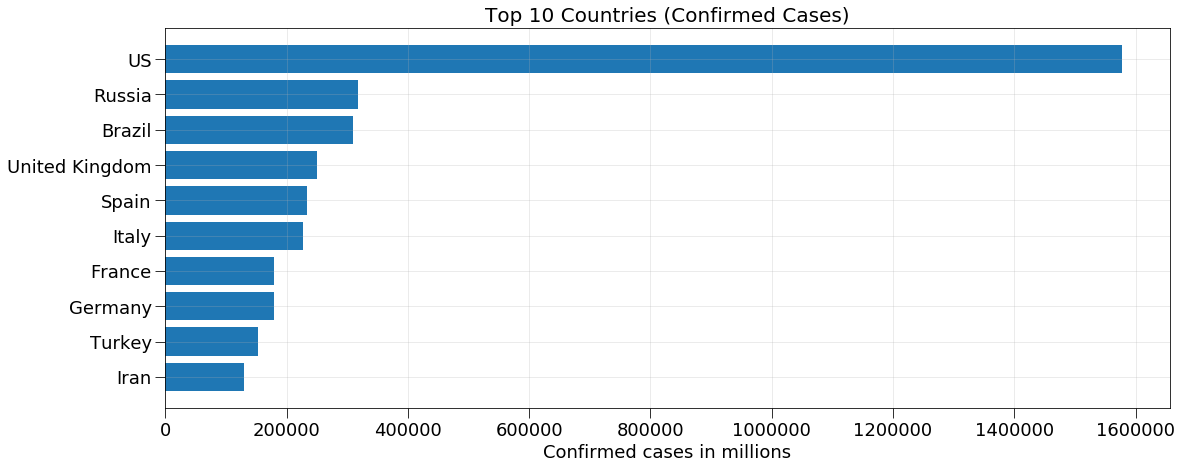

In [658]:
plt.figure(figsize=(18,7))
plt.barh(df_countries_10['Confirmed'].sort_values().index,df_countries_10['Confirmed'].sort_values().values,data=df)

plt.tick_params(size=10,labelsize = 18)
plt.xlabel("Confirmed cases in millions",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Confirmed_cases.png')

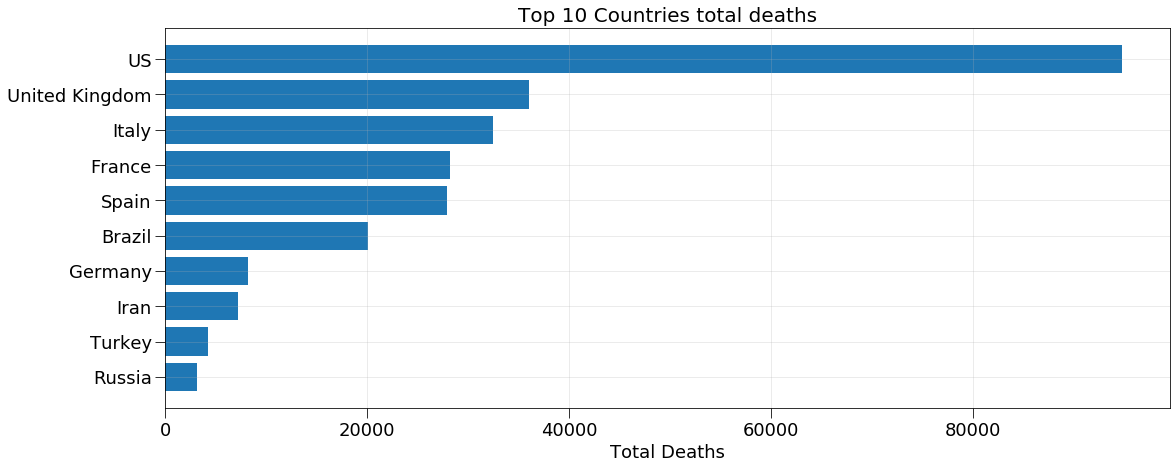

In [659]:
plt.figure(figsize=(18,7))
plt.barh(df_countries_10['Deaths'].sort_values().index,df_countries_10['Deaths'].sort_values().values,data=df)

plt.tick_params(size=10,labelsize = 18)
plt.xlabel("Total Deaths",fontsize=18)
plt.title("Top 10 Countries total deaths",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Total_Deaths.png')

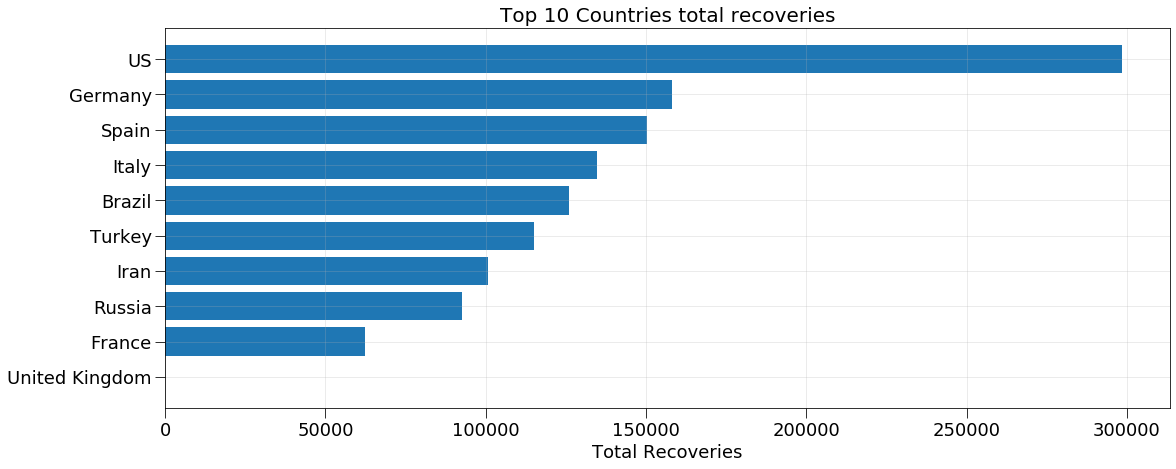

In [660]:
plt.figure(figsize=(18,7))
plt.barh(df_countries_10['Recovered'].sort_values().index,df_countries_10['Recovered'].sort_values().values,data=df)

plt.tick_params(size=10,labelsize = 18)
plt.xlabel("Total Recoveries",fontsize=18)
plt.title("Top 10 Countries total recoveries",fontsize=20)
plt.grid(alpha=0.3)
plt.savefig('Total_Recoveries.png')

In [661]:
df_countries_10.corr().style.background_gradient(cmap='Reds')

,Confirmed,Recovered,Deaths
Confirmed,1,0.781761,0.894617
Recovered,0.781761,1,0.612791
Deaths,0.894617,0.612791,1


In [662]:
cf.go_offline()
df_countries_10[['Confirmed','Deaths','Recovered']].iplot(kind='scatter',colors=['red','Blue','Green'],size=1,xTitle='Country',
                                                          yTitle='Case Count',gridcolor='Pink',title='Top 10 countries comparision',
                                                         filename="my_barplot")
#plt.savefig('top 10 countries comparision.png')

In [678]:
df3 = df_countries_10[['Confirmed','Deaths','Recovered']].values
df3 = pd.DataFrame(df3)
df3
df3.iplot(kind='surface',colorscale='rdylbu')


## Global spread of covid-19 on world geographical map

In [679]:
init_notebook_mode(connected=True) 
import plotly.graph_objs as go 

In [680]:
df_countries_10.index

Index(['US', 'Russia', 'Brazil', 'United Kingdom', 'Spain', 'Italy', 'France',
       'Germany', 'Turkey', 'Iran'],
      dtype='object', name='Country/Region')

In [681]:
data = dict(
        type = 'choropleth',
        colorscale = 'sunsetdark',
        reversescale = True,
        locations = df_countries.index,
        locationmode = "country names",
        z = df_countries['Confirmed'],
        text = df_countries.index,
        colorbar = {'title' : 'Confirmd number of cases ',
                    #'titlefont':'',
                    'bgcolor':'White'}
      ) 

layout = dict(title = 'COVID-19 spread across world',
                geo = dict(showframe = False)
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)
plt.savefig('Global spread.png')

<Figure size 432x288 with 0 Axes>

In [682]:
#covid_data['Province/State'].isnull()

In [683]:
ctr_date_data = covid_data[covid_data['Province/State'].isnull()]
ctr_date_data.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

In [684]:
#df_countries_11 = df_countries.head(11)
ctr_date_data  = ctr_date_data.reset_index().rename(columns={'Country/Region':'Country'})
ctr_date_data.set_index('Country',inplace=True)

In [685]:
ctr_date_data.head()

,index,Date,Confirmed,Recovered,Deaths
Country,,,,,
Afghanistan,0,2020-01-22,0.0,0.0,0.0
Afghanistan,1,2020-01-23,0.0,0.0,0.0
Afghanistan,2,2020-01-24,0.0,0.0,0.0
Afghanistan,3,2020-01-25,0.0,0.0,0.0
Afghanistan,4,2020-01-26,0.0,0.0,0.0


## Counting the number of days since the dayt 0th corona patient found

In [686]:
ctr_date_data.drop('index',axis=1,inplace=True)

In [687]:
days = ctr_date_data[ctr_date_data.index == 'Afghanistan'].count()
day = days['Date']
#day = days[days.index == 'Afghanistan']
day

121

## Plotting a graph for top 10 countries and comparing it with India

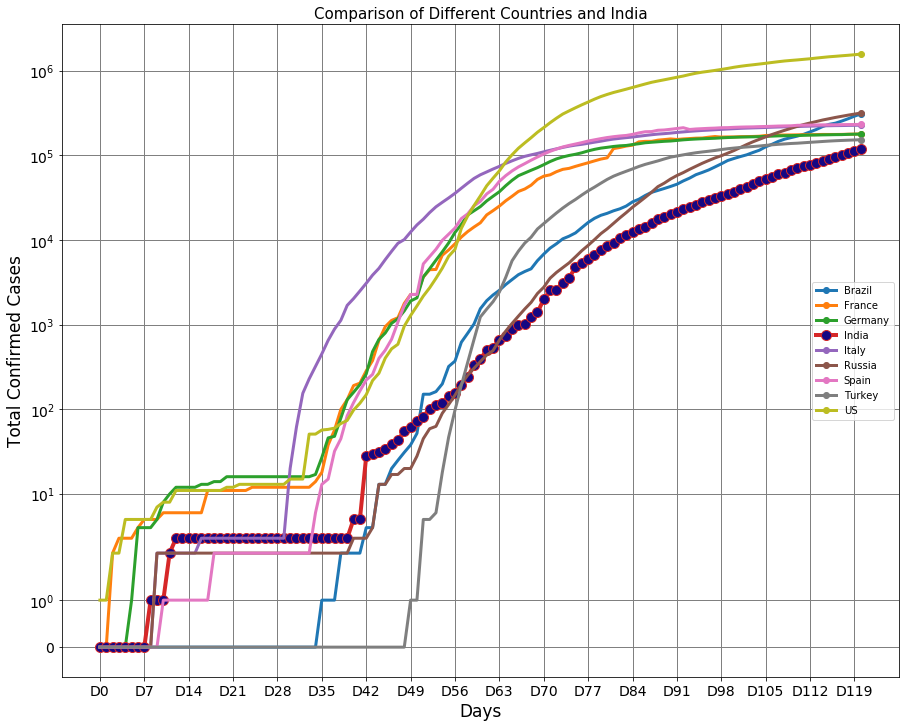

In [688]:
#day
f = plt.figure(figsize=(15,12))
ax = f.add_subplot(111)
for i,country in enumerate(ctr_date_data.groupby('Country').count().index):
    t = ctr_date_data.loc[ctr_date_data.index== country].values
    date = np.arange(0,len(t[:day]))
    xnew = np.linspace(date.min(), date.max(), day)
    #t[:-1]
    f = make_interp_spline(date, t[:,1:2], k=1)
    norm = f(xnew)
    if country in ('US','India','Spain','Russia','United Kingdome','Italy','Germany','Turkey','France','Brazil'):
        if country == 'India':
            marker_style = dict(linewidth=4, linestyle='-', marker='o',markersize=10, markerfacecolor='#150783')
            plt.plot(xnew,norm,"--",label = country,**marker_style)
        else:
            plt.plot(xnew,norm,'-o',label = country,linewidth =3, markevery=[-1])

plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,day,7),[ "D"+str(i) for i in range(day)][::7]) 


plt.xlabel("Days",fontsize=17)
plt.ylabel("Total Confirmed Cases",fontsize=17)
plt.title("Comparison of Different Countries and India",fontsize=15)
plt.legend(loc = "center right")
plt.yscale("symlog")
plt.grid(which="both",color='gray', linestyle='-', linewidth=1)
plt.savefig('Trend Comparison with India.png')
plt.show()
